In [ ]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
import itertools
import warnings
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

warnings.filterwarnings('ignore')

**Contamos con un dataset de robos realizado en Panama endonde utilizaremos el Modelo ARIMA ya que es un modelo util cuando se tiene datos de series temporales que pueden tener tanto una tendencia como una componente estacional, adicional se esta buscando aplicar una transformacion logaritmica a los datos para luego suavizarlos con un promedio movil para facilitar la precision y predecir la tendencia y su comportamiento estacional. Este dataset cuenta con periodos desde 2021-03 hasta 2023-12.**




In [ ]:
print(robos.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2021-03-01 to NaT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   robos   34 non-null     float64
dtypes: float64(1)
memory usage: 560.0 bytes
None


In [ ]:
#Importacion de biblioteca pandas
import pandas as pd

#Carga de dataset y uso de variable 'robos'
robos = pd.read_csv('RobosPanama.csv', sep= ';',index_col='mm', parse_dates=True)

# Eliminar filas con NaT en el indice
robos = robos.dropna()

#Convertir la columna a enteros
robos['robos'] = robos['robos'].astype(int)

#Ver las primeras filas del dataframe
print(robos.head())


            robos
mm               
2021-03-01    458
2021-04-01    455
2021-05-01    517
2021-06-01    495
2021-07-01    561


In [ ]:
#Muestra informacion del dataset
print(robos.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2021-03-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   robos   34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes
None


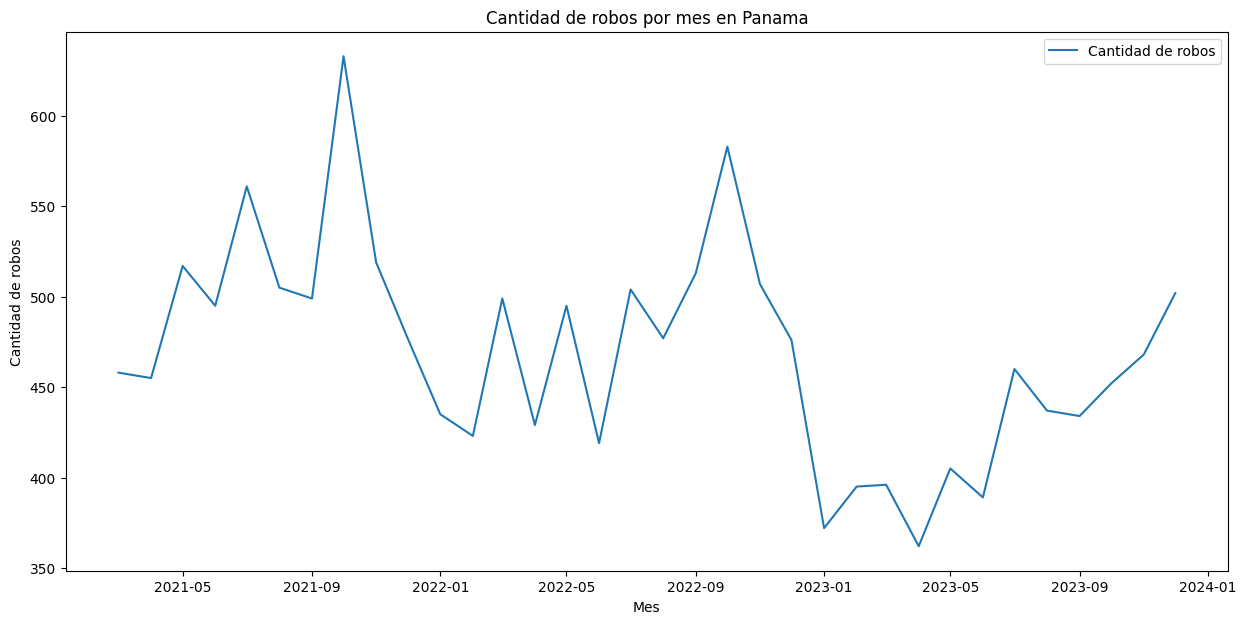

In [ ]:
#Configura tamaño de figura
plt.figure(figsize=(15, 7))

#Grafica serie temporal
plt.plot(robos, label='Cantidad de robos')

#Etiquetas y titulo de grafica
plt.xlabel('Mes')
plt.ylabel('Cantidad de robos')
plt.title('Cantidad de robos por mes en Panama')
plt.legend()
plt.show()

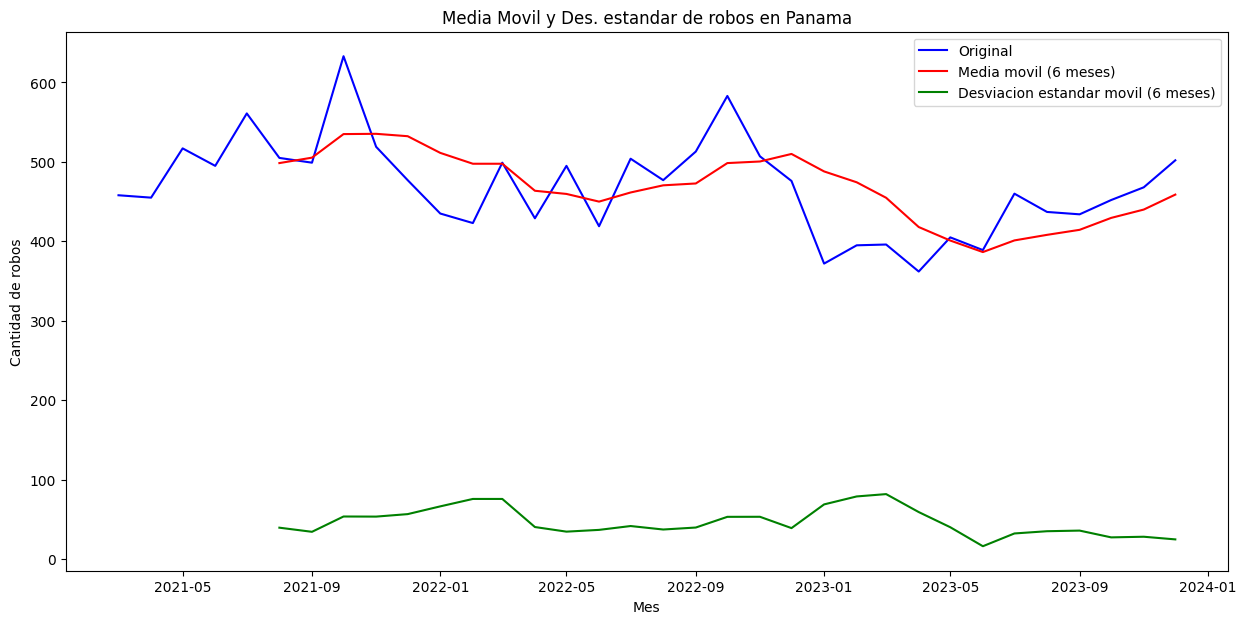

In [ ]:
#Importacion de biblioteca pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#Calcular media movil de 12 meses
rolmean = robos.rolling(window=6).mean()

#Calcular desviacion estandar movil de 6 meses
rolstd = robos.rolling(window=6).std()

#Grafica serie original, media movil y desv. estandar movil
plt.figure(figsize=(15, 7))
plt.plot(robos, label='Original', color='blue')
plt.plot(rolmean, label='Media movil (6 meses)', color='red')
plt.plot(rolstd, label='Desviacion estandar movil (6 meses)', color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de robos')
plt.legend(loc='best')
plt.title('Media Movil y Des. estandar de robos en Panama')
plt.show()

In [ ]:
#Establecer la frecuencia del indice temporal a mensual
robos.index.freq = 'MS'

#Mostrar las primeras filas del dataframe
print(robos.head())

#Mostrar informacion del dataframe
print(robos.info())

            robos
mm               
2021-03-01    458
2021-04-01    455
2021-05-01    517
2021-06-01    495
2021-07-01    561
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2021-03-01 to 2023-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   robos   34 non-null     int64
dtypes: int64(1)
memory usage: 1.6 KB
None


**Ahora vamos a hacer la descomposicion de serie temporal con el modelo especificado (model) para graficar la tendencia, la estacionariedad y los residuos en una grafica de cuatro subplots para mostrar la serie temporal original, representar la tendencia de la serie, mostrar la estacionariedad con la media y representar los residuos de la serie con su media.**

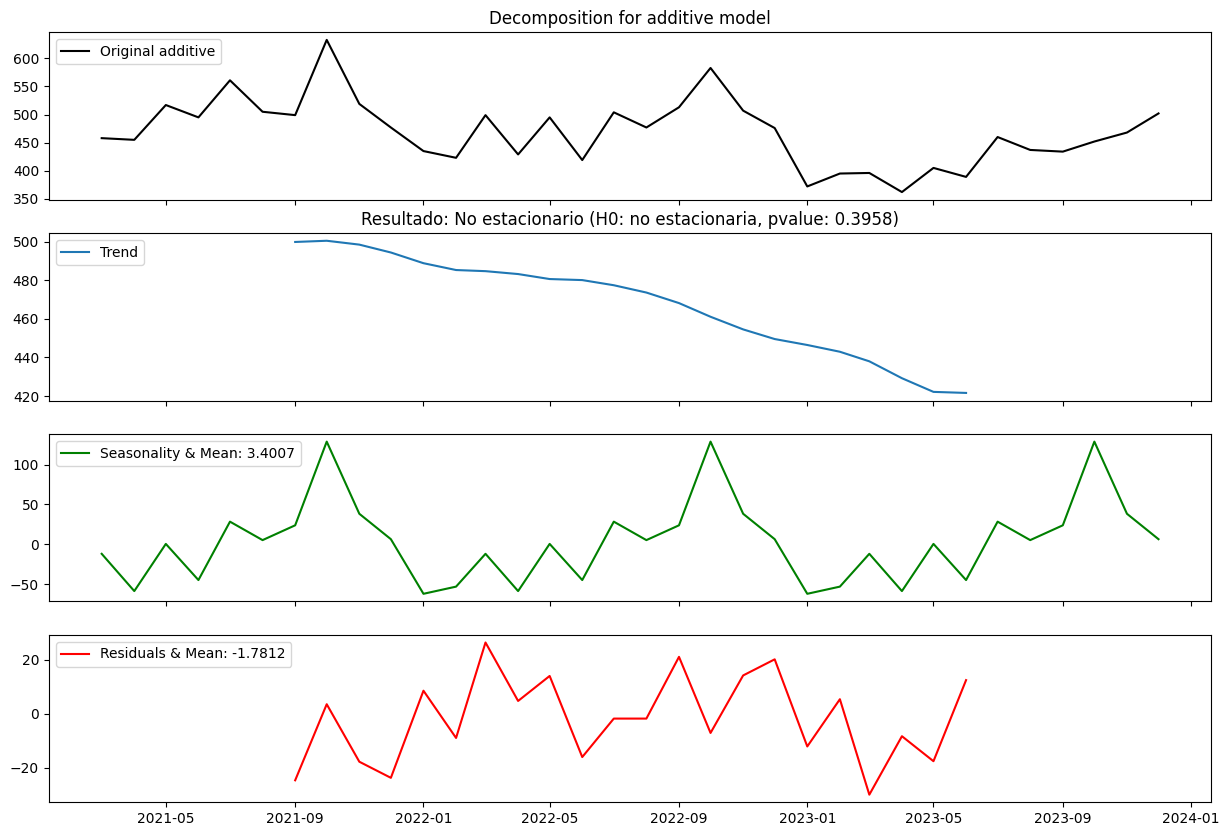

In [ ]:
#Definir la funcion ts_decompose
def ts_decompose(y, model='additive'):
  #Prueba de estacionalidad: Dickey-Fuller
  p_value = sm.tsa.stattools.adfuller(y)[1]
  if p_value < 0.05:
    is_istationary = f'Resultado: Estacionario (H0: no estacionaria, pvalue: {round(p_value, 4)})'
  else:
    is_istationary = f'Resultado: No estacionario (H0: no estacionaria, pvalue: {round(p_value, 4)})'

  #Descomponer la serie temporal
  result = seasonal_decompose(y, model=model)
  fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
  fig.set_figheight(10)
  fig.set_figwidth(15)

  axes[0].set_title('Decomposition for ' + model + ' model')
  axes[0].plot(y, 'k', label='Original ' + model)
  axes[0].legend(loc='upper left')

  axes[1].set_title(is_istationary)
  axes[1].plot(result.trend, label='Trend')
  axes[1].legend(loc='upper left')

  axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
  axes[2].legend(loc='upper left')

  axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
  axes[3].legend(loc='upper left')
  plt.show(block=True)

#Aplicar la funcion ts_decompose al dataset de robos
ts_decompose(robos['robos'], model='additive')


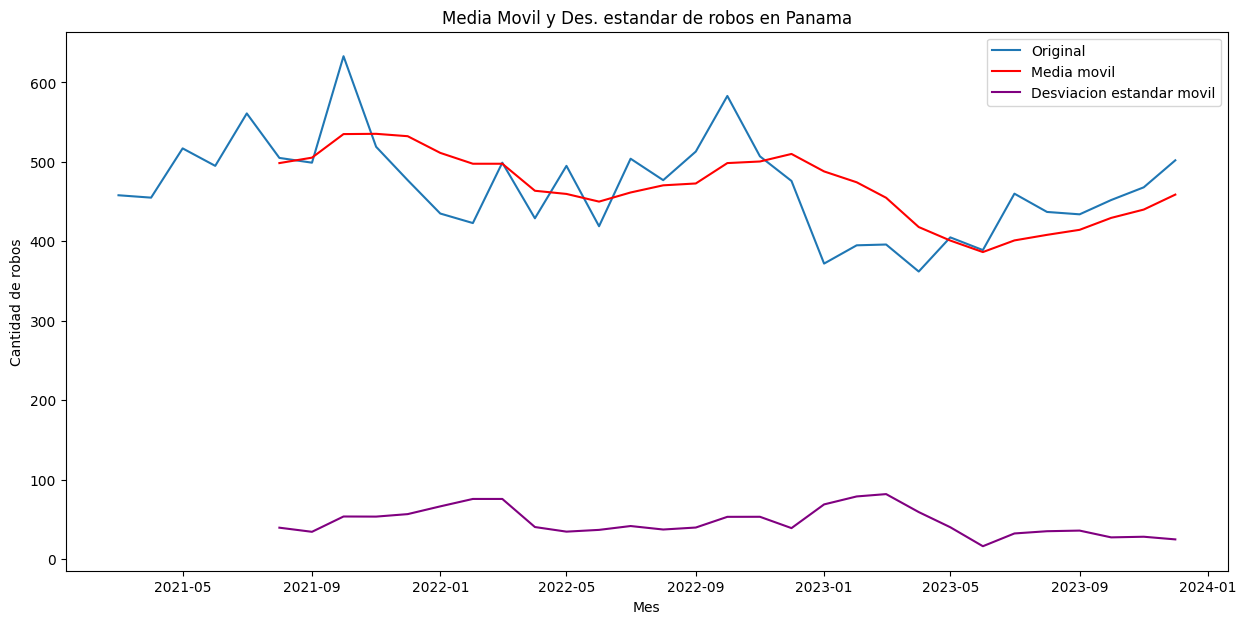

Dickey-Fuller aumentada:
Test Statistic                -1.7693
p-value                        0.3958
#Lags Used                     6.0000
Number of Observations Used   27.0000
Critical Value (1%)           -3.6996
Critical Value (5%)           -2.9764
Critical Value (10%)          -2.6276
dtype: float64


In [ ]:
#Definir funcion test_stationarity
def test_stationarity(timeseries):

  #Determinar rolling statistics (media movil y desv. estandar movil)
  rolmean = timeseries.rolling(window=6).mean()
  rolstd = timeseries.rolling(window=6).std()

  #Grafica de serie temporal original, media movil y desv estandar movil
  plt.figure(figsize=(15, 7))
  orig = plt.plot(timeseries, label='Original')
  mean = plt.plot(rolmean, color='red', label='Media movil')
  std = plt.plot(rolstd, color='purple', label='Desviacion estandar movil')
  plt.xlabel('Mes')
  plt.ylabel('Cantidad de robos')
  plt.title('Media Movil y Des. estandar de robos en Panama')
  plt.legend(loc='best')
  plt.show()

  #Pruebla de Dickey-Fuller aumentada
  print('Dickey-Fuller aumentada:')
  dftest = adfuller(timeseries, autolag='AIC')

  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

#Aplicar funcion test_stationarity al dataset
test_stationarity(robos['robos'])

**Como resultados de la prueba de Dickey-Fuller Aumentada, el estadistico nos da -1.7693, este valor es mayor a todos los valores criticos que se obtuvieron para los distintos niveles de significancia. Esto indica que no podemos rechazar la hipotesis nula de que la serie tiene una raíz unitaria, el p-valor es 0.3958, que es mayor a los niveles de significancia y refuerza la conclusion de que no puede rechazarse la hipotesis nula.**